In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd


In [ ]:
#Indicamos la ubicación y nombre del fichero
archivo = '/content/processed_dataset.csv'

In [ ]:
# Cargar el archivo de Excel especificando el motor 'openpyxl'
import pandas as pd

# Carga correcta de un CSV
df = pd.read_csv("processed_dataset.csv")

# Verifico
print(df.head())

   Aerolinea     Origen    Destino  Número de vuelos  Precio medio  \
0  Air India  Ahmedabad     Mumbai                39    257.489692   
1    Vistara    Kolkata  Bangalore              4655    371.572632   
2    Vistara  Ahmedabad  Bangalore               237    358.485591   
3  Air India      Delhi    Chennai               178    335.645657   
4  Air India    Chennai      Delhi               208    308.080120   

   Duración media del vuelo  Número promedio de escalas  \
0                  7.247223                    1.000000   
1                 15.632386                    1.110849   
2                  6.042018                    1.000000   
3                  5.475328                    0.865169   
4                  5.213181                    0.884615   

   Promedio días de antelación  Porcentaje de vuelos business  \
0                     1.205128                       0.102564   
1                    24.836090                       0.469603   
2                     1.66244

# Categorizacion variables

In [ ]:
# Definino las variables categóricas a transformar
categorical_cols = ['Aerolinea', 'Origen', 'Destino']

In [ ]:
# Inicio el One-Hot Encoder
encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' evita la multicolinealidad


In [ ]:
# AplicO OHE y conviertor a DataFrame
encoded_data = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))


In [ ]:
# Ahora concateno con el dataset original (sin las columnas categóricas originales)
df_encoded = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)


In [ ]:
# Mostrar las primeras filas del nuevo dataset codificado
df_encoded.head()


,Número de vuelos,Precio medio,Duración media del vuelo,Número promedio de escalas,Promedio días de antelación,Porcentaje de vuelos business,Número de vuelos_log,Precio medio_log,Duración media del vuelo_log,Promedio días de antelación_log,...,Origen_Delhi,Origen_Hyderabad,Origen_Kolkata,Origen_Mumbai,Destino_Bangalore,Destino_Chennai,Destino_Delhi,Destino_Hyderabad,Destino_Kolkata,Destino_Mumbai
0,39,257.489692,7.247223,1.000000,1.205128,0.102564,3.688879,5.554856,2.109877,0.790786,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4655,371.572632,15.632386,1.110849,24.836090,0.469603,8.445912,5.920432,2.811352,3.251772,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,237,358.485591,6.042018,1.000000,1.662447,0.185654,5.472271,5.884674,1.951895,0.979246,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,178,335.645657,5.475328,0.865169,1.674157,0.488764,5.187386,5.819031,1.867999,0.983634,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,208,308.080120,5.213181,0.884615,1.682692,0.466346,5.342334,5.733601,1.826673,0.986821,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import StandardScaler

# Selecciono las variables numéricas
numerical_cols = ['Número de vuelos', 'Precio medio', 'Duración media del vuelo', 'Número promedio de escalas']

# Inicializo el escalador
scaler = StandardScaler()

# Aplico la estandarización
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Muestro las primeras filas del dataset transformado
df_encoded.head()


,Número de vuelos,Precio medio,Duración media del vuelo,Número promedio de escalas,Promedio días de antelación,Porcentaje de vuelos business,Número de vuelos_log,Precio medio_log,Duración media del vuelo_log,Promedio días de antelación_log,...,Origen_Delhi,Origen_Hyderabad,Origen_Kolkata,Origen_Mumbai,Destino_Bangalore,Destino_Chennai,Destino_Delhi,Destino_Hyderabad,Destino_Kolkata,Destino_Mumbai
0,-0.677489,0.731470,-0.065627,0.683581,1.205128,0.102564,3.688879,5.554856,2.109877,0.790786,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.474824,1.620458,1.703920,1.011986,24.836090,0.469603,8.445912,5.920432,2.811352,3.251772,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.542273,1.518478,-0.319966,0.683581,1.662447,0.185654,5.472271,5.884674,1.951895,0.979246,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.582565,1.340498,-0.439556,0.284123,1.674157,0.488764,5.187386,5.819031,1.867999,0.983634,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.562077,1.125694,-0.494878,0.341737,1.682692,0.466346,5.342334,5.733601,1.826673,0.986821,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
# Verifico la media y desviación estándar después de la estandarización
df_encoded[['Número de vuelos', 'Precio medio', 'Duración media del vuelo', 'Número promedio de escalas']].describe()


,Número de vuelos,Precio medio,Duración media del vuelo,Número promedio de escalas
count,3.070000e+02,3.070000e+02,3.070000e+02,3.070000e+02
mean,-4.628943e-17,-9.257886e-17,-1.330821e-16,-2.545919e-16
std,1.001633e+00,1.001633e+00,1.001633e+00,1.001633e+00
min,-7.034398e-01,-1.136448e+00,-1.549307e+00,-2.279066e+00
25%,-6.757820e-01,-8.118152e-01,-7.181782e-01,-1.198138e-01
50%,-5.511508e-01,-5.845589e-01,-1.983145e-01,3.460968e-01
75%,3.963871e-01,1.043556e+00,6.376902e-01,6.835809e-01
max,3.533335e+00,2.276200e+00,2.177426e+00,1.840963e+00


# Divido en entrenamiento y prueba

In [ ]:
from sklearn.model_selection import train_test_split

# Defino las variables predictoras (X) y la variable objetivo (y)
X = df_encoded.drop(columns=['Precio medio'])  # Variables independientes
y = df_encoded['Precio medio']  # Variable objetivo

# Divido el conjunto de datos en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# tamaño de cada conjunto
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((245, 35), (62, 35), (245,), (62,))

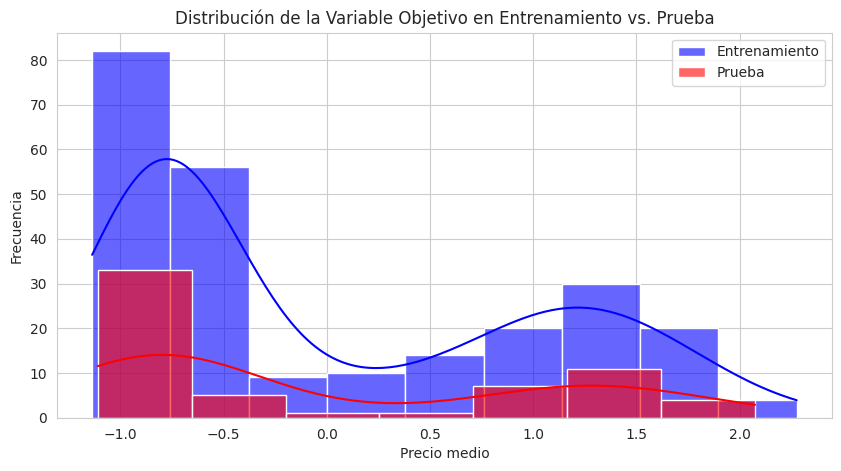

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))

# Histograma del conjunto de entrenamiento
sns.histplot(y_train, kde=True, color='blue', label="Entrenamiento", alpha=0.6)

# Histograma del conjunto de prueba
sns.histplot(y_test, kde=True, color='red', label="Prueba", alpha=0.6)

plt.legend()
plt.title("Distribución de la Variable Objetivo en Entrenamiento vs. Prueba")
plt.xlabel("Precio medio")
plt.ylabel("Frecuencia")
plt.show()


# REGRESIÓN LINEAL

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# inicio el modelo
modelo_lr = LinearRegression()

# Entreno el modelo con los datos de entrenamiento
modelo_lr.fit(X_train, y_train)

# hago Predicciones
y_pred_train = modelo_lr.predict(X_train)
y_pred_test = modelo_lr.predict(X_test)

# evaluamos el modelo con métricas de regresión
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Imprimir resultados
print("📊 Resultados Regresión Lineal 📊")
print(f"🔹 MAE Entrenamiento: {mae_train:.4f} | MAE Prueba: {mae_test:.4f}")
print(f"🔹 RMSE Entrenamiento: {rmse_train:.4f} | RMSE Prueba: {rmse_test:.4f}")
print(f"🔹 R² Entrenamiento: {r2_train:.4f} | R² Prueba: {r2_test:.4f}")


📊 Resultados Regresión Lineal 📊
🔹 MAE Entrenamiento: 0.0461 | MAE Prueba: 0.0516
🔹 RMSE Entrenamiento: 0.0611 | RMSE Prueba: 0.0678
🔹 R² Entrenamiento: 0.9962 | R² Prueba: 0.9957


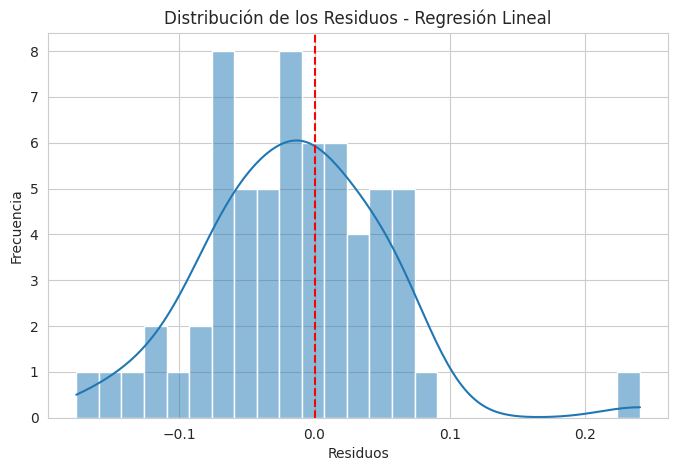

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculo de los residuos
residuos = y_test - y_pred_test

# Graficar histograma de los residuos
plt.figure(figsize=(8,5))
sns.histplot(residuos, bins=25, kde=True)
plt.axvline(x=0, color='r', linestyle='dashed')
plt.title("Distribución de los Residuos - Regresión Lineal")
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.show()


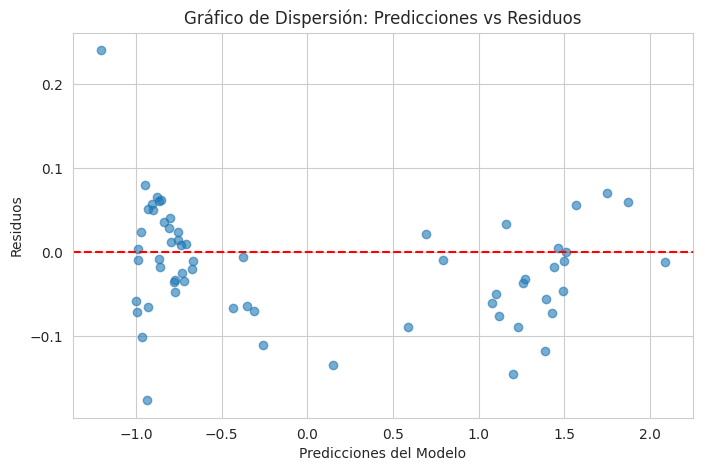

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(y_pred_test, residuos, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='dashed')
plt.title("Gráfico de Dispersión: Predicciones vs Residuos")
plt.xlabel("Predicciones del Modelo")
plt.ylabel("Residuos")
plt.show()


# RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Definio el modelo Random Forest con parámetros iniciales
rf_model = RandomForestRegressor(
    n_estimators=100,  # Número de árboles en el bosque
    max_depth=10,  # Profundidad máxima de los árboles
    min_samples_split=5,  # Mínimo de muestras para dividir un nodo
    min_samples_leaf=3,  # Mínimo de muestras en una hoja
    random_state=42
)

# Entrenar el modelo con el conjunto de entrenamiento
rf_model.fit(X_train, y_train)

# Hago predicciones en entrenamiento y prueba
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Evaluación del modelo con métricas de desempeño
mae_train_rf = mean_absolute_error(y_train, y_train_pred_rf)
mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)
rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
r2_train_rf = r2_score(y_train, y_train_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

# imprimo resultados
print(f"📊 Resultados Random Forest 📊")
print(f"🔹 MAE Entrenamiento: {mae_train_rf:.4f} | MAE Prueba: {mae_test_rf:.4f}")
print(f"🔹 RMSE Entrenamiento: {rmse_train_rf:.4f} | RMSE Prueba: {rmse_test_rf:.4f}")
print(f"🔹 R² Entrenamiento: {r2_train_rf:.4f} | R² Prueba: {r2_test_rf:.4f}")


📊 Resultados Random Forest 📊
🔹 MAE Entrenamiento: 0.0097 | MAE Prueba: 0.0106
🔹 RMSE Entrenamiento: 0.0230 | RMSE Prueba: 0.0206
🔹 R² Entrenamiento: 0.9995 | R² Prueba: 0.9996


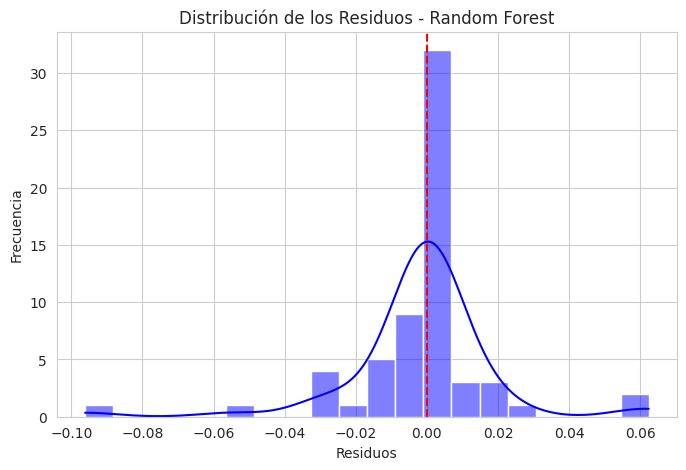

In [ ]:
# Calculo residuos
residuos_rf = y_test - y_test_pred_rf

# Histograma de los residuos
plt.figure(figsize=(8,5))
sns.histplot(residuos_rf, bins=20, kde=True, color="blue")
plt.axvline(x=0, color='red', linestyle='dashed')
plt.title("Distribución de los Residuos - Random Forest")
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.show()


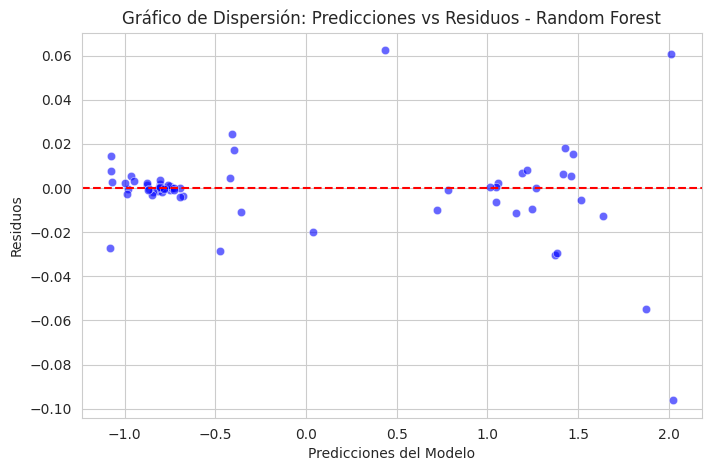

In [ ]:
# Gráfico de Dispersión: Predicciones vs. Residuos
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test_pred_rf, y=residuos_rf, color="blue", alpha=0.6)
plt.axhline(y=0, color='red', linestyle='dashed')
plt.title("Gráfico de Dispersión: Predicciones vs Residuos - Random Forest")
plt.xlabel("Predicciones del Modelo")
plt.ylabel("Residuos")
plt.show()


# XGBOOST (INICIAL)

In [ ]:

import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Definición y entrenamiento
xgb_inicial = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
xgb_inicial.fit(X_train, y_train)

# Predicciones
y_pred_train_init = xgb_inicial.predict(X_train)
y_pred_test_init  = xgb_inicial.predict(X_test)

# Métricas
mae_train_init  = mean_absolute_error(y_train, y_pred_train_init)
mae_test_init   = mean_absolute_error(y_test,  y_pred_test_init)
rmse_train_init = np.sqrt(mean_squared_error(y_train, y_pred_train_init))
rmse_test_init  = np.sqrt(mean_squared_error(y_test,  y_pred_test_init))
r2_train_init   = r2_score(y_train, y_pred_train_init)
r2_test_init    = r2_score(y_test,  y_pred_test_init)

# Salida
print("🏷️ XGBoost Inicial")
print(f"• MAE  Entrenamiento: {mae_train_init:.4f} | Prueba: {mae_test_init:.4f}")
print(f"• RMSE Entrenamiento: {rmse_train_init:.4f} | Prueba: {rmse_test_init:.4f}")
print(f"• R²   Entrenamiento: {r2_train_init:.4f} | Prueba: {r2_test_init:.4f}")



🏷️ XGBoost Inicial
• MAE  Entrenamiento: 0.0013 | Prueba: 0.0120
• RMSE Entrenamiento: 0.0020 | Prueba: 0.0213
• R²   Entrenamiento: 1.0000 | Prueba: 0.9996


# XGBOOST (OPTIMIZACIÓN DE HIPERPARÁMETROS)

In [ ]:

import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Parámetros hallados por RandomizedSearchCV
best_params = {
    'n_estimators':     198,
    'max_depth':        3,
    'learning_rate':    0.0906834739267264,
    'subsample':        0.9105651842967988,
    'colsample_bytree': 0.9002459006563434,
    'reg_alpha':        0.4126176769114265,
    'reg_lambda':       4.720180857927832
}

# Definición y entrenamiento sin early_stopping
xgb_tuned = xgb.XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    **best_params
)
xgb_tuned.fit(X_train, y_train)

# Predicciones
y_pred_train_tuned = xgb_tuned.predict(X_train)
y_pred_test_tuned  = xgb_tuned.predict(X_test)

# Métricas
mae_train_tuned  = mean_absolute_error(y_train, y_pred_train_tuned)
mae_test_tuned   = mean_absolute_error(y_test,  y_pred_test_tuned)
rmse_train_tuned = np.sqrt(mean_squared_error(y_train, y_pred_train_tuned))
rmse_test_tuned  = np.sqrt(mean_squared_error(y_test,  y_pred_test_tuned))
r2_train_tuned   = r2_score(y_train, y_pred_train_tuned)
r2_test_tuned    = r2_score(y_test,  y_pred_test_tuned)

# Salida
print("🏷️ XGBoost Tuned")
print(f"• MAE  Entrenamiento: {mae_train_tuned:.4f} | Prueba: {mae_test_tuned:.4f}")
print(f"• RMSE Entrenamiento: {rmse_train_tuned:.4f} | Prueba: {rmse_test_tuned:.4f}")
print(f"• R²   Entrenamiento: {r2_train_tuned:.4f} | Prueba: {r2_test_tuned:.4f}")


🏷️ XGBoost Tuned
• MAE  Entrenamiento: 0.0066 | Prueba: 0.0151
• RMSE Entrenamiento: 0.0214 | Prueba: 0.0249
• R²   Entrenamiento: 0.9995 | Prueba: 0.9994




```
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX```



# Visualizaciones estandarización

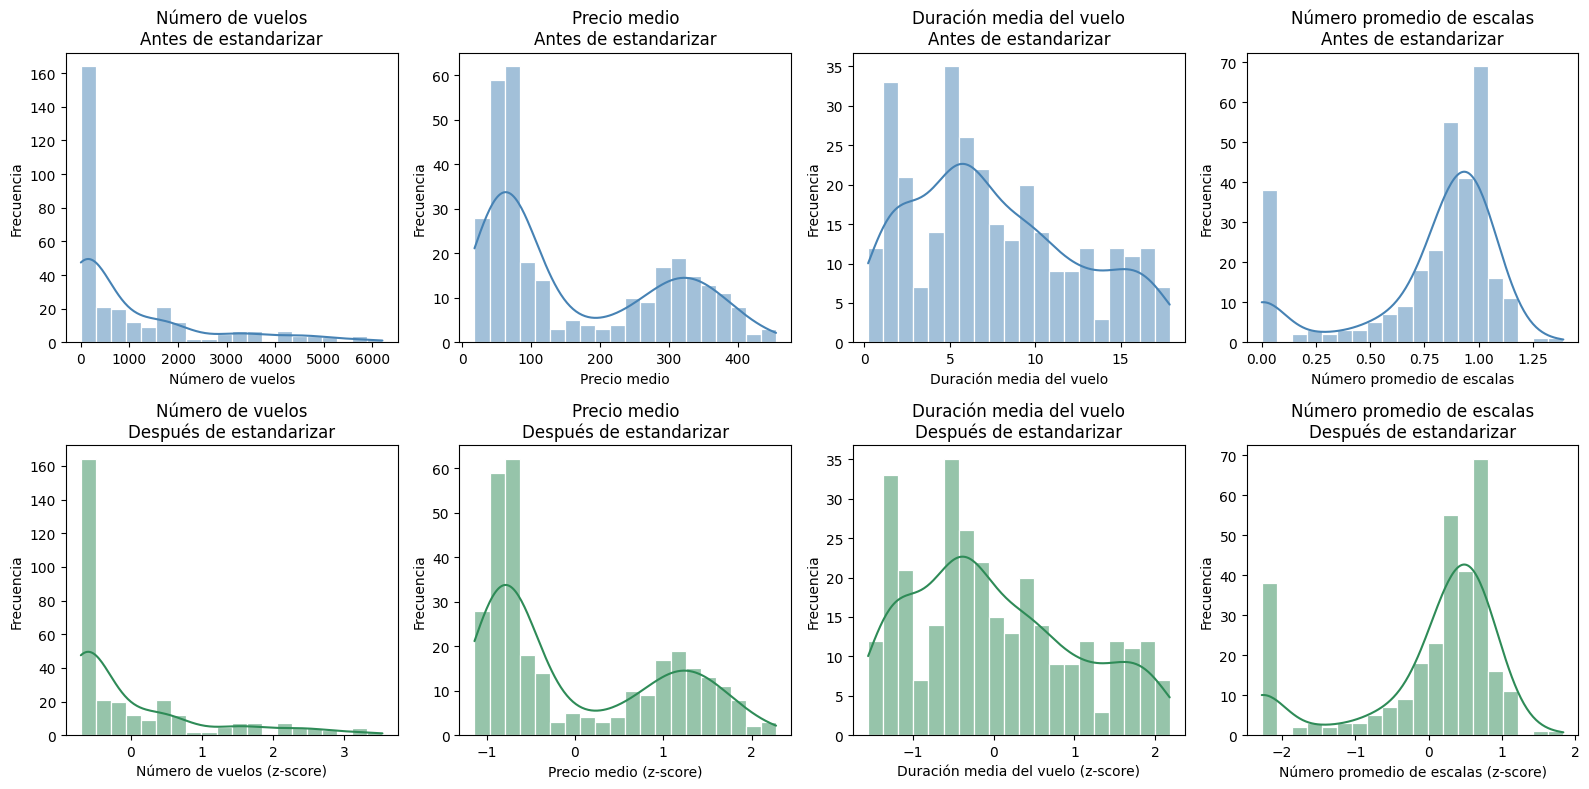

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Variables numéricas a estandarizar
numerical_cols = [
    "Número de vuelos",
    "Precio medio",
    "Duración media del vuelo",
    "Número promedio de escalas"
]

# Cargo el CSV
df = pd.read_csv("processed_dataset.csv")

# Copio antes de estandarizar
df_before = df[numerical_cols].copy()

# Estandarización
scaler = StandardScaler()
df_after = df_before.copy()
df_after[numerical_cols] = scaler.fit_transform(df_before[numerical_cols])

# Plot
fig, axes = plt.subplots(2, len(numerical_cols), figsize=(16, 8))
sns.set_style("whitegrid")

for idx, col in enumerate(numerical_cols):
    # Antes de estandarizar
    ax1 = axes[0, idx]
    sns.histplot(
        df_before[col],
        kde=True,
        ax=ax1,
        color="steelblue",
        bins=20
    )
    ax1.set_title(f"{col}\nAntes de estandarizar")
    ax1.set_xlabel(col)
    ax1.set_ylabel("Frecuencia")

    # Después de estandarizar
    ax2 = axes[1, idx]
    sns.histplot(
        df_after[col],
        kde=True,
        ax=ax2,
        color="seagreen",
        bins=20
    )
    ax2.set_title(f"{col}\nDespués de estandarizar")
    ax2.set_xlabel(f"{col} (z-score)")
    ax2.set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()



# Intento de clustering

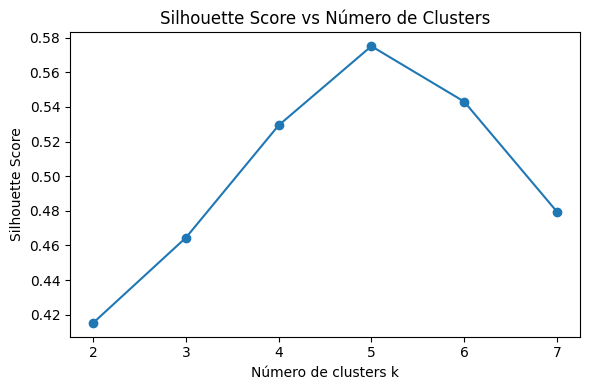

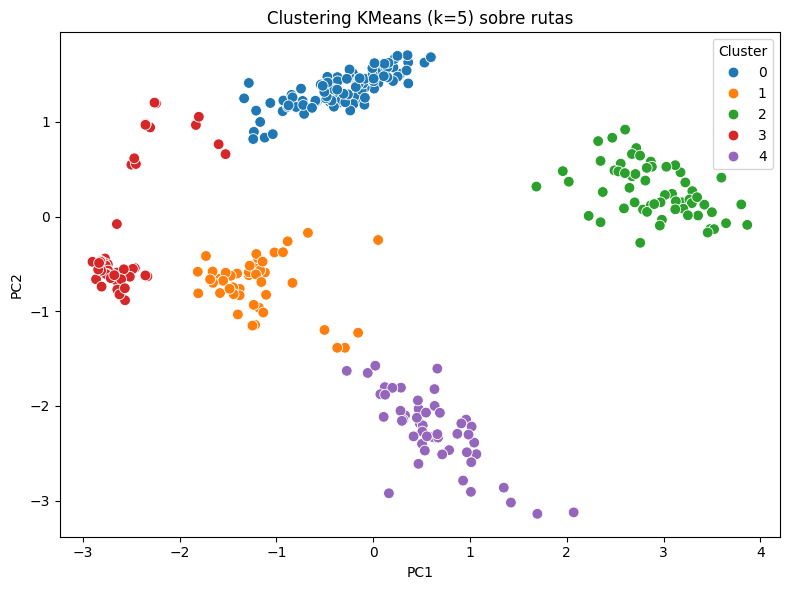

Resumen de clusters (medias y tamaño):


,Número de vuelos,Precio medio,Duración media del vuelo,Número promedio de escalas,Promedio días de antelación,Porcentaje de vuelos business,n_rutas
cluster,,,,,,,
0,890.67,58.27,8.55,0.84,26.04,0.00,104
1,25.04,129.69,4.06,0.89,1.43,0.00,47
2,3580.62,300.78,14.48,0.98,25.17,0.44,60
3,38.78,56.45,1.78,0.05,7.56,0.00,46
4,122.16,348.65,5.78,0.94,1.66,0.43,50



Text Mining: no hay variables textuales en el dataset, esta técnica no aplica.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# 1. Carga de datos
df = pd.read_csv('processed_dataset.csv')

# 2. Crear variable 'ruta' concatenada
df['ruta'] = df['Origen'] + '–' + df['Destino']

# 3. Selección de variables numéricas para clustering
num_feats = [
    'Número de vuelos',
    'Precio medio',
    'Duración media del vuelo',
    'Número promedio de escalas',
    'Promedio días de antelación',
    'Porcentaje de vuelos business'
]
X = df[num_feats].values

# 4. Escalado de las variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Búsqueda del k óptimo mediante Silhouette Score
sil_scores = []
K_range = range(2, 8)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)

# 6. Dibujar Silhouette vs k
plt.figure(figsize=(6,4))
plt.plot(K_range, sil_scores, marker='o')
plt.title('Silhouette Score vs Número de Clusters')
plt.xlabel('Número de clusters k')
plt.ylabel('Silhouette Score')
plt.xticks(K_range)
plt.tight_layout()
plt.show()

# 7. Ajuste final de KMeans con el mejor k
best_k = K_range[np.argmax(sil_scores)]
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)

# 8. Reducción de dimensionalidad con PCA para visualizar
pca = PCA(n_components=2, random_state=42)
pcs = pca.fit_transform(X_scaled)
df['pc1'] = pcs[:, 0]
df['pc2'] = pcs[:, 1]

# 9. Scatter plot de clusters en el espacio PCA
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df, x='pc1', y='pc2',
    hue='cluster', palette='tab10', s=60
)
plt.title(f'Clustering KMeans (k={best_k}) sobre rutas')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# 10. Resumen de cada cluster
cluster_summary = df.groupby('cluster')[num_feats].mean().round(2)
cluster_summary['n_rutas'] = df.groupby('cluster').size()
print("Resumen de clusters (medias y tamaño):")
display(cluster_summary)

# 11. Text Mining (no aplicable)
print("\nText Mining: no hay variables textuales en el dataset, esta técnica no aplica.")


# ESTIMACION D EPRECIOS (INPUT DE VARIABLES----> PREDICCIÓN)

In [ ]:
import pandas as pd
from sklearn.model_selection   import train_test_split
from sklearn.pipeline          import Pipeline
from sklearn.compose           import ColumnTransformer
from sklearn.preprocessing     import OneHotEncoder, StandardScaler
from sklearn.ensemble          import RandomForestRegressor

# 0) Carga el DataFrame original (con las 9 columnas crudas)
df = pd.read_csv('processed_dataset.csv')

# 1) Separa X e y a partir de ese df
X = df[[
    'Aerolinea','Origen','Destino',
    'Número de vuelos','Duración media del vuelo',
    'Número promedio de escalas','Promedio días de antelación',
    'Porcentaje de vuelos business'
]]
y = df['Precio medio']

# 2) Partición 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3) Define qué columnas son numéricas y cuáles categóricas
num_feats = [
    'Número de vuelos',
    'Duración media del vuelo',
    'Número promedio de escalas',
    'Promedio días de antelación',
    'Porcentaje de vuelos business'
]
cat_feats = ['Aerolinea','Origen','Destino']

# 4) Crea el ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_feats),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_feats)
])

# 5) Ensambla el Pipeline completo
pipeline_rf = Pipeline([
    ('pre', preprocessor),
    ('rf', RandomForestRegressor(
        n_estimators=200,
        max_depth=8,
        min_samples_split=5,
        random_state=42
    ))
])

# 6) Entrena el pipeline con X_train (¡aún contiene las columnas crudas!)
pipeline_rf.fit(X_train, y_train)

print("✅ pipeline_rf entrenado correctamente")


✅ pipeline_rf entrenado correctamente


In [ ]:
# Input por consola en Colab
aero   = input("Aerolínea: ")
orig   = input("Ciudad origen: ")
dest   = input("Ciudad destino: ")
dias   = float(input("Días de antelación: "))
biz    = input("¿Business? (s/n): ").lower() == 's'

precio = predict_price(aero, orig, dest, dias, biz)
print(f"\n👉 Precio estimado: {precio:.2f} €")


Aerolínea: Vistara
Ciudad origen: Kolkata
Ciudad destino: Bangalore
Días de antelación: 2
¿Business? (s/n): s

👉 Precio estimado: 399.22 €
